In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import yfinance as yf


import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
chipotle = yf.download('CMG')

[*********************100%***********************]  1 of 1 completed


In [3]:
chipotle

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,CMG,CMG,CMG,CMG,CMG,CMG
Date,,,,,,
2006-01-26 00:00:00+00:00,0.880000,0.880000,0.965600,0.790200,0.900000,660930000
2006-01-27 00:00:00+00:00,0.844000,0.844000,0.898000,0.835000,0.897600,57540000
2006-01-30 00:00:00+00:00,0.896000,0.896000,0.910200,0.825000,0.844000,36790000
2006-01-31 00:00:00+00:00,0.950400,0.950400,0.986000,0.907600,0.910000,55560000
2006-02-01 00:00:00+00:00,0.931200,0.931200,0.984800,0.905000,0.978000,30335000
...,...,...,...,...,...,...
2025-01-03 00:00:00+00:00,59.700001,59.700001,60.200001,59.209999,60.130001,5914100
2025-01-06 00:00:00+00:00,58.799999,58.799999,59.930000,58.500000,59.919998,10256200


In [4]:
chipotle['prevclose'] = chipotle['Close'].shift(1)

In [5]:
chipotle['prevclose']

Date
2006-01-26 00:00:00+00:00          NaN
2006-01-27 00:00:00+00:00     0.880000
2006-01-30 00:00:00+00:00     0.844000
2006-01-31 00:00:00+00:00     0.896000
2006-02-01 00:00:00+00:00     0.950400
                               ...    
2025-01-03 00:00:00+00:00    59.889999
2025-01-06 00:00:00+00:00    59.700001
2025-01-07 00:00:00+00:00    58.799999
2025-01-08 00:00:00+00:00    57.990002
2025-01-10 00:00:00+00:00    57.919998
Name: prevclose, Length: 4771, dtype: float64

In [6]:
chipotle[('return', 'CMG')] = (
    (chipotle[('Close', 'CMG')] - chipotle[('prevclose', '')]) 
    / chipotle[('prevclose', '')]
)

In [7]:
chipotle

Price,Adj Close,Close,High,Low,Open,Volume,prevclose,return
Ticker,CMG,CMG,CMG,CMG,CMG,CMG,,CMG
Date,,,,,,,,
2006-01-26 00:00:00+00:00,0.880000,0.880000,0.965600,0.790200,0.900000,660930000,NaN,NaN
2006-01-27 00:00:00+00:00,0.844000,0.844000,0.898000,0.835000,0.897600,57540000,0.880000,-0.040909
2006-01-30 00:00:00+00:00,0.896000,0.896000,0.910200,0.825000,0.844000,36790000,0.844000,0.061611
2006-01-31 00:00:00+00:00,0.950400,0.950400,0.986000,0.907600,0.910000,55560000,0.896000,0.060714
2006-02-01 00:00:00+00:00,0.931200,0.931200,0.984800,0.905000,0.978000,30335000,0.950400,-0.020202
...,...,...,...,...,...,...,...,...
2025-01-03 00:00:00+00:00,59.700001,59.700001,60.200001,59.209999,60.130001,5914100,59.889999,-0.003172
2025-01-06 00:00:00+00:00,58.799999,58.799999,59.930000,58.500000,59.919998,10256200,59.700001,-0.015075


array([[<Axes: title={'center': 'CMG'}>]], dtype=object)

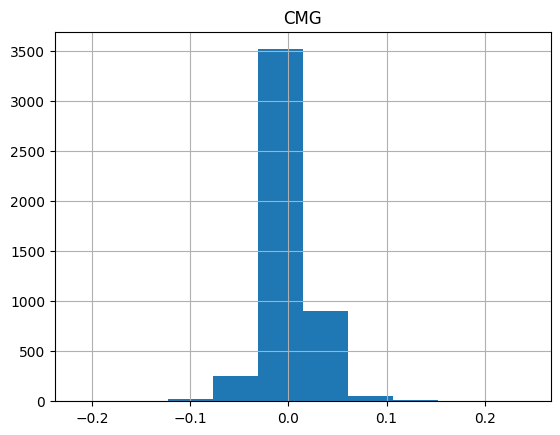

In [8]:
chipotle['return'].hist()

In [9]:
series = chipotle['return'].values[1:].reshape(-1,1)
scalar = StandardScaler()
scalar.fit(series[:len(series) // 2])
series = scalar.transform(series).flatten()


In [10]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X-Shape: ", X.shape, "Y-Shape", Y.shape)


X-Shape:  (4760, 10, 1) Y-Shape (4760,)


In [11]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer=Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N // 2], Y[:-N // 2],
    epochs=100,
    validation_data=(X[-N // 2:], Y[-N // 2:])
)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9790 - val_loss: 0.7569
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9417 - val_loss: 0.7472
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9341 - val_loss: 0.7434
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0055 - val_loss: 0.7283
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9657 - val_loss: 0.7349
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0384 - val_loss: 0.7336
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0261 - val_loss: 0.7282
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0319 - val_loss: 0.7289
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0182 - val_loss: 0.7634
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0147 - val_loss: 0.7361
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1258 - val_loss: 0.7328
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9

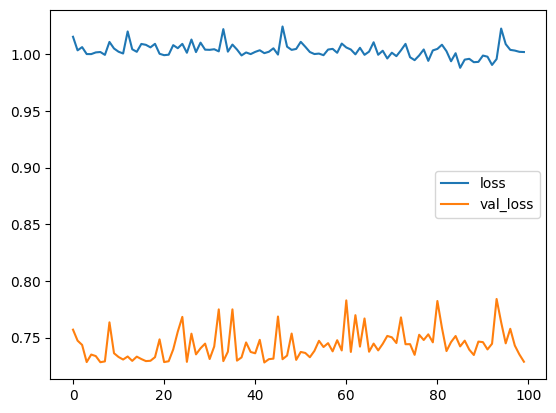

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(4760, 1)


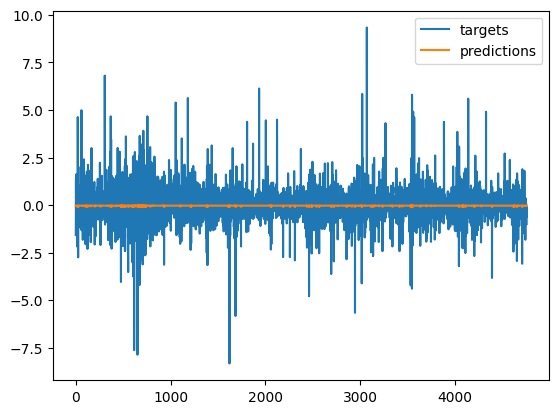

In [13]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

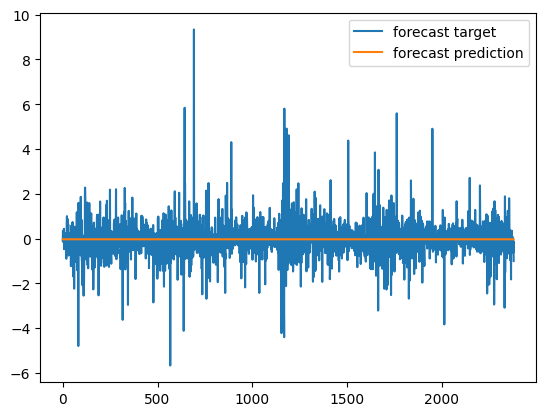

In [14]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [15]:
input_data = chipotle[["Open", 'High', 'Low', 'Close','Volume']].values
targets = chipotle["return"].values


In [16]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T


In [17]:
Ntrain = len(input_data) * 2 // 3
scalar = StandardScaler()
scalar.fit(input_data[:Ntrain + T])
input_data = scalar.transform(input_data)

In [18]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)


C:\Users\micha\AppData\Local\Temp\ipykernel_11876\4244901927.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_train[t] = (targets[t+T] > 0)


In [19]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

C:\Users\micha\AppData\Local\Temp\ipykernel_11876\314970648.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_test[u] = (targets[t+T] > 0)


In [20]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.001),
  metrics=['accuracy'],
)

In [21]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5035 - loss: 0.6959 - val_accuracy: 0.4636 - val_loss: 0.7642
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5205 - loss: 0.6935 - val_accuracy: 0.4700 - val_loss: 0.7777
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5324 - loss: 0.6908 - val_accuracy: 0.4794 - val_loss: 0.7369
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5225 - loss: 0.6921 - val_accuracy: 0.4636 - val_loss: 0.7874
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5241 - loss: 0.6918 - val_accuracy: 0.4674 - val_loss: 0.7844
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5235 - loss: 0.6920 - val_accuracy: 0.4655 - val_loss: 0.7954
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5181 - loss: 0.6927 - val_accuracy: 0.4630 - val_loss: 0.8042
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5160 - loss: 0.6927 - val_accu

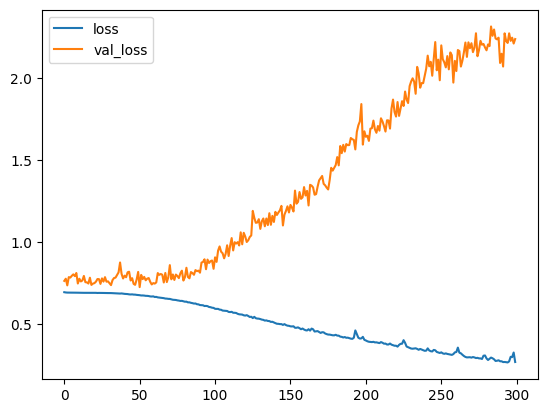

In [22]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


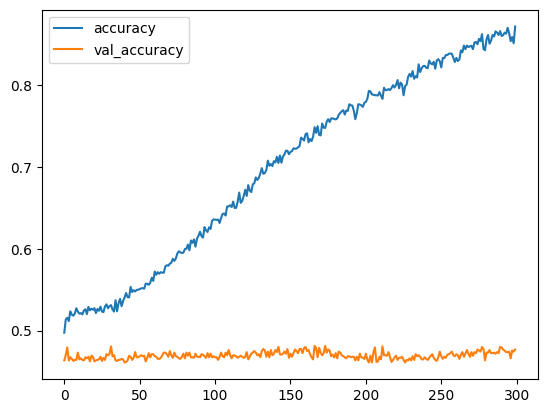

In [23]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()